In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

%matplotlib inline

# Crime 
Crime may or may not be a good predictor for profitable AirBnB.  In this notebook I explore a 55 MB Boston crime dataset retrieved from Kaggle.

In [2]:
data = pd.read_csv('../data/raw/crime.csv', encoding = 'latin-1')

In [3]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [4]:
data.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

<BarContainer object of 17 artists>

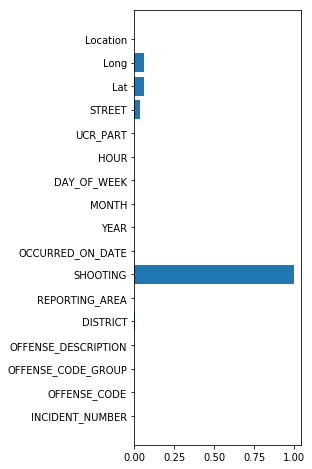

In [5]:
plt.figure(figsize = (3, 8))
plt.barh(
    data.isna().sum().index,
    data.isna().sum().values / len(data)
)

<BarContainer object of 67 artists>

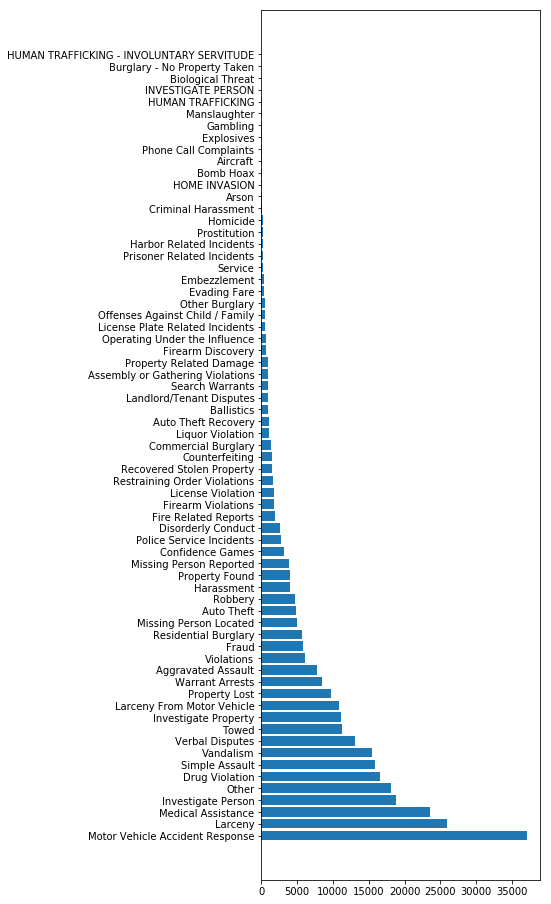

In [6]:
plt.figure(figsize = (5, 16))
plt.barh(
    data['OFFENSE_CODE_GROUP'].value_counts().index,
    data['OFFENSE_CODE_GROUP'].value_counts().values
)   

### Reduce
Let's start reducing the dataset down into things that may be useful.  I am not doing a very deep dive into this data, just trying to build one or a few features as input to my main model.  Given infinite time this would be interesting to dive deeply into.

In [7]:
crime_counts = data['OFFENSE_CODE_GROUP'].value_counts()

In [8]:
top_crimes = list(crime_counts[crime_counts.values > 5000].index)

In [9]:
data['is_top_crime'] = data['OFFENSE_CODE_GROUP'].apply(lambda x: x in top_crimes)

In [10]:
data = data[data['is_top_crime'] > 0]

In [11]:
data = data[['OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'Lat', 'Long']]

In [12]:
data = data[data['Lat'] > 39]
data = data[data['Long'] < -68]

In [13]:
data.head()

,OFFENSE_CODE,OFFENSE_CODE_GROUP,Lat,Long
0,619,Larceny,42.357791,-71.139371
1,1402,Vandalism,42.306821,-71.060300
2,3410,Towed,42.346589,-71.072429
3,3114,Investigate Property,42.334182,-71.078664
4,3114,Investigate Property,42.275365,-71.090361


In [14]:
data.dropna(how = 'any', inplace = True)

In [15]:
data.isna().sum()

OFFENSE_CODE          0
OFFENSE_CODE_GROUP    0
Lat                   0
Long                  0
dtype: int64

In [16]:
data.describe()

,OFFENSE_CODE,Lat,Long
count,243239.000000,243239.000000,243239.000000
mean,2314.287347,42.322567,-71.082846
std,1193.881335,0.031860,0.029836
min,402.000000,42.232413,-71.178674
25%,802.000000,42.297690,-71.097437
50%,3006.000000,42.326146,-71.077530
75%,3201.000000,42.348624,-71.062459
max,3831.000000,42.395042,-70.964365


In [17]:
top_crimes

['Motor Vehicle Accident Response',
 'Larceny',
 'Medical Assistance',
 'Investigate Person',
 'Other',
 'Drug Violation',
 'Simple Assault',
 'Vandalism',
 'Verbal Disputes',
 'Towed',
 'Investigate Property',
 'Larceny From Motor Vehicle',
 'Property Lost',
 'Warrant Arrests',
 'Aggravated Assault',
 'Violations',
 'Fraud',
 'Residential Burglary']

In [18]:
important_crimes = ['Investigate Person', 'Drug Violation', 'Simple Assault', 
                   'Aggravated Assault']

In [19]:
data['is_important_crime'] = data['OFFENSE_CODE_GROUP'].apply(lambda x: x in important_crimes)

In [20]:
data = data[data['is_important_crime'] > 0]

In [21]:
data = data[['OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'Lat', 'Long']]

In [22]:
data['OFFENSE_CODE'].value_counts()

3115    18018
802     13942
413      4547
423      2711
1849     2203
1843     1871
1810     1802
1842     1286
1874     1190
1841     1187
1830     1121
801       913
1845      762
1848      722
1846      520
1844      398
1832      321
1831      300
1815      170
1847      166
1806      158
1850      130
1805      115
1870       75
1825       71
804        62
2617       19
403         6
1807        4
803         3
1866        2
1863        1
1864        1
404         1
432         1
402         1
2609        1
Name: OFFENSE_CODE, dtype: int64

In [23]:
from sklearn.neighbors import KernelDensity

In [24]:
kde = KernelDensity(kernel = 'exponential', bandwidth = 0.002)

In [25]:
kde.fit(data[['Lat', 'Long']].values)

KernelDensity(algorithm='auto', atol=0, bandwidth=0.002, breadth_first=True,
       kernel='exponential', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

In [32]:
lat_grid = np.linspace(
    data['Lat'].min(),
    data['Lat'].max(),
    120
)

long_grid = np.linspace(
    data['Long'].min(),
    data['Long'].max(),
    120
)

grid = np.zeros((120, 120))

In [33]:
for i in range(120):
    for j in range(120):
        grid[i, j] = kde.score_samples(
                np.array([long_grid[i], lat_grid[j]]).reshape(1, -1)
        )

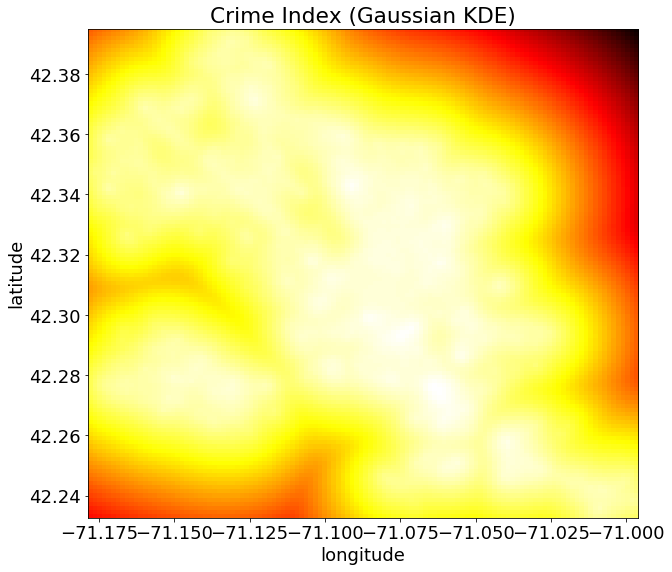

In [44]:
plt.figure(figsize = (16, 9))
plt.rc('font', size = 18)
plt.imshow(grid, cmap = 'hot', extent = [data['Long'].min(), data['Long'].max(), data['Lat'].min(), data['Lat'].max()])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Crime Index (Gaussian KDE)')
plt.savefig('../image/crime_kde.png', bbox_inches = 'tight')